# Price Elasticity - Price Optimization

# Table Of Contents
[1. Introduction To Price Elasticity](#1.-1.Introduction_To_Price_Elasticity)\
[2.Importance and Demand of Own Price Elasticity](#2.-Importance_and_Demand_of_Own_Price_Elasticity)\
[3. Price Elasticity Optimization In Python](#3.-Price_Elasticity_Optimization_In_Python)\
[4.Project Outline](#4.-Project_Outline)
 * 4.1.Preprocess Data
 * 4.2.Feature Engineering
 * 4.3.Encoding 
 * 4.4.Data Split & Model Build
 * 4.5.Price Prediction
 * 4.6.Scores: R2, MAE, RMSE
 * 4.7.Importance of Features
 * 4.8.Hyperparameter Tuning\
 
[5.Visualization-Price_Distribution](#5.-Visualization-Price_Distribution)

[6. Price-Demand Model with GAMs](#5.-Price_Demand_Model_with_GAMs)
 * 6.1. Data Generation: Adding Data
 * 6.2. Model Visualization

* i.GAM Model for "Every Day" Price
* ii.Data Visualization: Price Quantity Model Profiles

[7.Benefits Of GAMs And Insights](#7.-.Benefits_Of_GAMs_And_Insights)

# 1. Introduction To Price Elasticity
   In everyday commerce and in business studies, a key factor to dive into the important concept of  "Price Elasticity" calculation.The comprehensive understanding of how changes in price impacts directly the quantity damand of a product, the learning of the formula, the determinants and effective calculation is the need of a successful busines aspect. The indepth knowledge of Individual Price Elasticity of demand helps in decision making, price optimization & strategy building.These aids in making business successful.

# 2. Importance and Demand of Own Price Elasticity
Understanding own Price Elasticity of demand is an essential aspect in business studies. Initially, it provides a measure that implies the change that how quantity demanded for a good or services in response to the change in it's own price. Businesses can avoid poor pricing decision and potentially harmful outcomes by examining the product's Price Elasticity.

### Factors that influence on business pricing strategy
- Variation in Season
- Level of Demand
- Availability of Product
- Market Trend
- Competitor Price
 

# 3. Price Elasticity Optimization In Python
Hence we shall use the data set from Airline Industry implementing Machine Learning process. Financial losses are frequent in Airline sector. The factors like high fixed expenses, extreme competetion, seasonal fluctuations, and regulatory limitations are the major ones. To face these challanges, Dynamic Price Optimization to optimize the price is highly recommended and helpful. 

### Library imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

C:\Users\Sarmita\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Read Airline Data set 

In [2]:
def return_df(file):    
    return pd.read_csv(file, header = 0)

df = return_df("AirData.csv")
df.head(5)

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


# 4. Project Outline
- 4.1 Preprocess Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date of Booking  1000 non-null   object
 1   Date of Journey  1000 non-null   object
 2   Airline-Class    1000 non-null   object
 3   Departure Time   1000 non-null   object
 4   Arrival Time     1000 non-null   object
 5   Duration         1000 non-null   object
 6   Total Stops      1000 non-null   object
 7   Price            1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


### Missing Value/ Nan Value Treatment

In [4]:
df.isnull().sum()

Date of Booking    0
Date of Journey    0
Airline-Class      0
Departure Time     0
Arrival Time       0
Duration           0
Total Stops        0
Price              0
dtype: int64

In [5]:
def clean_data_df(df):
    
    #Airline Class
    df['Airline-Name']=df['Airline-Class'].str.split('\n').str[0].str.strip()

     
    df['Class'] = df['Airline-Class'].str.split('\n').str[-1].str.strip()
    
    #journey date
    df['Date of Journey']=pd.to_datetime(df['Date of Journey'],format='%d/%m/%Y')
    
    #date of booking 
    df['Date of Booking']=pd.to_datetime(df['Date of Booking'],format='%d/%m/%Y')
    
    #days before flight
    df['days_before_flight']=(df['Date of Journey']-df['Date of Booking']).dt.days
    
    # day of booking
    df['journey_day']=df['Date of Journey'].dt.day
    
    df['journey_day_name']=df['Date of Journey'].dt.day_name()
    
   
    
    # Departure City
    df['Departure City']=df['Departure Time'].str.split('\n').str[1].str.strip()    
    
    # Arrival City
    df['Arrival City']=df['Arrival Time'].str.split('\n').str[1].str.strip()
    
    
    #TotalStops Cleanup
    df['Total Stops'] = df['Total Stops'].str.replace(r'\n\s*\t*', '', regex=True)
    df['Total Stops'] = df['Total Stops'].str.replace(r'(stop).*', r'\1', regex=True)
    
    #Departure Time
    df['Departure_Time']=df['Departure Time'].str.split('\n').str[0].str.strip()
    
    #Arrival Time
    df['Arrival_Time']=df['Arrival Time'].str.split('\n').str[0].str.strip()
    
    #Duration
    df['Duration'] = df['Duration'].str.extract(r'(\d+)h (\d+)m') \
                                     .astype(float) \
                                     .apply(lambda x: round(x[0] + x[1] / 60, 4), axis=1)
    # Extract hour from 'arrival' column
    df['arrival_time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.hour

    # Categorize arrivals based on the hour
    df['arrival_category'] = df['arrival_time'].apply(lambda x: 'Before 7pm' if x < 19 else 'After 7pm')
                            
    #drop columns
    df.drop(['Date of Booking','Date of Journey','Airline-Class','Departure Time','Arrival Time','arrival_time'],axis=1,inplace=True)
                            
    df['Price'] = df['Price'].replace(',', '', regex=True).astype(int)
    return df

In [6]:
df = clean_data_df(df)

### Cleaned Data Looks Like:-

In [7]:
df.head()

,Duration,Total Stops,Price,Airline-Name,Class,days_before_flight,journey_day,journey_day_name,Departure City,Arrival City,Departure_Time,Arrival_Time,arrival_category
0,2.0833,non-stop,5335,SpiceJet,ECONOMY,1,16,Monday,Delhi,Mumbai,20:00,22:05,After 7pm
1,2.3333,non-stop,5899,Indigo,ECONOMY,1,16,Monday,Delhi,Mumbai,23:00,01:20,Before 7pm
2,2.1667,non-stop,5801,GO FIRST,ECONOMY,1,16,Monday,Delhi,Mumbai,22:30,00:40,Before 7pm
3,2.0833,non-stop,5794,SpiceJet,ECONOMY,1,16,Monday,Delhi,Mumbai,18:50,20:55,After 7pm
4,2.1667,non-stop,5955,Air India,ECONOMY,1,16,Monday,Delhi,Mumbai,20:00,22:10,After 7pm


### 4.2. Feature Engineering

In [8]:
# Summary Statistics
df.describe()

,Duration,Price,days_before_flight,journey_day
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.324666,22459.242000,1.879000,16.879000
std,7.168103,19919.015251,0.772629,0.772629
min,1.916700,4364.000000,1.000000,16.000000
25%,4.583300,8774.000000,1.000000,16.000000
50%,8.833300,13967.000000,2.000000,17.000000
75%,14.666700,26365.250000,2.000000,17.000000
max,28.166700,96223.000000,3.000000,18.000000


In [9]:


def feature_engineering(df):
    #concatenate route
    df['Route'] = df['Departure City'] + ' -> ' + df['Arrival City']
    
    #drop appended columns above
    df.drop(['Departure City','Arrival City'],axis=1,inplace=True)
    
    
    ## Convert Departure and Arrival to the hr
    df['Departure_Time_hr']=pd.to_datetime(df['Departure_Time'], format='%H:%M').dt.hour
    df['Arrival_Time_hr']=pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.hour
    
    df.drop(['Departure_Time','Arrival_Time'],axis=1,inplace=True)
    
    
    
    return(df)
    

In [10]:
df = feature_engineering(df)

In [11]:
df=df[(df['Airline-Name'] == 'Air India') & (df['Class']=='ECONOMY')  & (df['Route']=='Delhi -> Mumbai')]

In [12]:
#Dropping the Airline-Name
df.drop(['Class','Airline-Name','Route'],inplace=True,axis=1)

### 4.3. Encode data

In [13]:
def encoding_data(df):
    #Number of Stops
    df=pd.get_dummies(df, columns=['Total Stops'], prefix='Stops',dtype=int)        

    
    # Frequency of the journey Day NAme
    frequency_map = df['journey_day_name'].value_counts(normalize=True).to_dict()
    df['journey_day_name_freq'] = df['journey_day_name'].map(frequency_map)
    
    df.drop(['journey_day_name'],axis=1,inplace=True)
    
    # Using the LabelEncoder
    label_encoder = LabelEncoder()
    df['arrival_category'] = label_encoder.fit_transform(df['arrival_category'])
    
        
    return (df)    

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [15]:
encoding_df = encoding_data(df)
encoding_df.head()

,Duration,Price,days_before_flight,journey_day,arrival_category,Departure_Time_hr,Arrival_Time_hr,Stops_1-stop,Stops_non-stop,journey_day_name_freq
4,2.1667,5955,1,16,0,20,22,0,1,0.298137
5,2.2500,5955,1,16,0,21,23,0,1,0.298137
6,2.2500,5955,1,16,1,22,0,0,1,0.298137
39,13.5000,7194,1,16,0,8,21,1,0,0.298137
40,15.3333,7194,1,16,0,8,23,1,0,0.298137


### 4.4. Model Build & Target - Predictor Selection

In [16]:

X = encoding_df.drop(['Price',],axis=1)
y = encoding_df['Price']
    
#split the dataset for train&test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
def modelXGB(encoding_df):      
    model = xgb.XGBRegressor(learning_rate= 0.1, 
                             max_depth= 10, 
                             subsample= 0.77, 
                             colsample_bytree= 0.79,
                             min_child_weight=1)
    model.fit(X_train, y_train)

    
    return model

In [18]:
model = modelXGB(encoding_df)
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.79, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 4.5. Price prediction

In [19]:
Price_predicted = model.predict(X_test)
Price_predicted

array([ 6026.052 ,  6247.3555, 14090.967 ,  6862.646 , 14334.241 ,
       11507.28  , 18923.947 ,  6362.7617, 20183.02  , 13080.291 ,
        8765.994 , 14189.507 ,  9599.338 ,  9723.14  , 10768.582 ,
       15472.586 ,  8704.042 , 14389.03  , 14648.273 , 12240.677 ,
       13546.946 ,  9554.037 , 10957.555 ,  9923.722 , 11486.683 ,
       14259.205 , 16525.188 ,  5897.304 , 12685.641 ,  6299.609 ,
        9926.55  , 12129.692 ,  9683.107 ], dtype=float32)

### 4.6. R2- score, MSE & RMSE score

In [20]:
r2 = r2_score(y_test, Price_predicted)
print('r2 is',r2)

rmse = mean_squared_error(y_test,Price_predicted, squared=False)
print('rmse is',rmse)

r2 is 0.7680366045417928
rmse is 2112.6865149465893


### 4.7. Importance of Features

In [21]:
# Importance of Features
feature_importance =model.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
6,Stops_1-stop,0.192402
8,journey_day_name_freq,0.170811
0,Duration,0.145924
4,Departure_Time_hr,0.126561
5,Arrival_Time_hr,0.116067
3,arrival_category,0.088034
2,journey_day,0.084814
1,days_before_flight,0.073209
7,Stops_non-stop,0.002178


In [22]:
def feat_eng(df):
    #concatenate route
    df['Route'] = df['Departure City'] + ' -> ' + df['Arrival City']
    
    #drop appended columns above
    df.drop(['Departure City','Arrival City'],axis=1,inplace=True)
    
    
    ## Convert Departure and Arrival to the hr
    df['Departure_Time_hr']=pd.to_datetime(df['Departure_Time'], format='%H:%M').dt.hour
    df['Arrival_Time_hr']=pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.hour
    
    df.drop(['Departure_Time','Arrival_Time'],axis=1,inplace=True)
    
    
    
    return(df)

In [23]:
!pip install optuna

In [24]:

import optuna

def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": 300,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 0.01,0.1),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }
        
    
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, verbose=False)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [25]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-04-29 20:39:13,864] A new study created in memory with name: no-name-05ee4d0b-4ee5-470f-aaf8-d3279d85c4fc
[I 2024-04-29 20:39:14,124] Trial 0 finished with value: 3047.3188258199966 and parameters: {'learning_rate': 0.02095148903918465, 'max_depth': 6, 'subsample': 0.4706891295665731, 'colsample_bytree': 0.6764985608649807, 'min_child_weight': 10}. Best is trial 0 with value: 3047.3188258199966.
[I 2024-04-29 20:39:14,609] Trial 1 finished with value: 2312.094817251667 and parameters: {'learning_rate': 0.072492711137198, 'max_depth': 10, 'subsample': 0.7086265647714444, 'colsample_bytree': 0.9341046365066923, 'min_child_weight': 4}. Best is trial 1 with value: 2312.094817251667.
[I 2024-04-29 20:39:14,813] Trial 2 finished with value: 3095.615783055636 and parameters: {'learning_rate': 0.0796050466255344, 'max_depth': 8, 'subsample': 0.21120662900149373, 'colsample_bytree': 0.7246203972668195, 'min_child_weight': 8}. Best is trial 1 with value: 2312.094817251667.
[I 2024-04-29 

[I 2024-04-29 20:39:25,591] Trial 28 finished with value: 2450.1635658466926 and parameters: {'learning_rate': 0.06839780437007247, 'max_depth': 10, 'subsample': 0.650562235334606, 'colsample_bytree': 0.5465809328083555, 'min_child_weight': 4}. Best is trial 21 with value: 1849.043755770622.
[I 2024-04-29 20:39:26,127] Trial 29 finished with value: 2749.0463390911573 and parameters: {'learning_rate': 0.01594700563104964, 'max_depth': 9, 'subsample': 0.4079258734290733, 'colsample_bytree': 0.45680197404616846, 'min_child_weight': 2}. Best is trial 21 with value: 1849.043755770622.
[I 2024-04-29 20:39:26,606] Trial 30 finished with value: 2533.1873955033143 and parameters: {'learning_rate': 0.05456955417765782, 'max_depth': 7, 'subsample': 0.9212285250941432, 'colsample_bytree': 0.3728288659745155, 'min_child_weight': 5}. Best is trial 21 with value: 1849.043755770622.
[I 2024-04-29 20:39:27,319] Trial 31 finished with value: 2009.782203287167 and parameters: {'learning_rate': 0.05474360

### 4.8. BEST parameter selection- Hyperparameter Tuning

In [26]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.03559628659916626, 'max_depth': 10, 'subsample': 0.9983496743609346, 'colsample_bytree': 0.45170484688398294, 'min_child_weight': 1}
Best RMSE: 1849.043755770622


In [27]:
import numpy as np
from scipy.optimize import minimize

# Calculate revenue before optimization
revenue_before = np.sum(Price_predicted)

# Define the objective function (maximize revenue)
def objective_function(prices):
    revenue = -np.sum(prices)  
    return revenue

# Define constraints
def constraint(prices, Price_predicted, min_revenue):
    return np.concatenate([prices - Price_predicted, Price_predicted * 1.2 - prices, [np.sum(prices) - min_revenue]])

# Define initial prices (use predicted prices as initial guess)
initial_prices = Price_predicted

# Minimum revenue constraint
min_revenue = np.sum(Price_predicted) * 0.9  



# Adjust constraints to ensure prices are no lower than predicted and no greater than 1.2 times predicted
bounds = [(price, price * 1.2) for price in Price_predicted]

# Perform optimization
result = minimize(objective_function, initial_prices, constraints={'type': 'ineq', 'fun': constraint, 'args': (Price_predicted, min_revenue)}, bounds=bounds)

# Get optimized prices
optimized_prices = result.x

# Calculate revenue after optimization
revenue_after = np.sum(optimized_prices)

# Print revenue before and after optimization
print("Revenue before optimization:", revenue_before)
print("Revenue after optimization:", revenue_after)

Revenue before optimization: 378994.97
Revenue after optimization: 454793.96191406244


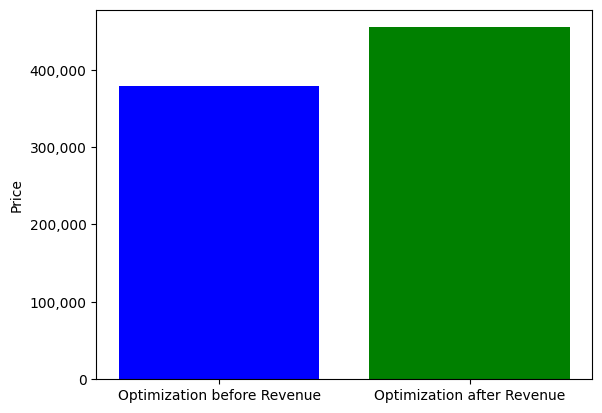

In [28]:
# Revenue Before and After
revenue = [revenue_before, revenue_after]

# Define labels for the bars
labels = ['Optimization before Revenue', 'Optimization after Revenue']


# Plotting
plt.bar(labels, revenue, color=['blue', 'green'])
plt.ylabel('Price')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [29]:
Prices_df = pd.DataFrame({
    'price_prediction': Price_predicted,
    'Optimized Prices': optimized_prices
})
Prices_df

,price_prediction,Optimized Prices
0,6026.051758,7231.262109
1,6247.355469,7496.826562
2,14090.966797,16909.160156
3,6862.645996,8235.175195
4,14334.241211,17201.089453
5,11507.280273,13808.736328
6,18923.947266,22708.736719
7,6362.761719,7635.314062
8,20183.019531,24219.623437
9,13080.291016,15696.349219


# 5. Visualization- Predicted and Optimized Price

Text(0.5, 1.0, 'Distribution of Predicted and Optimized Prices')

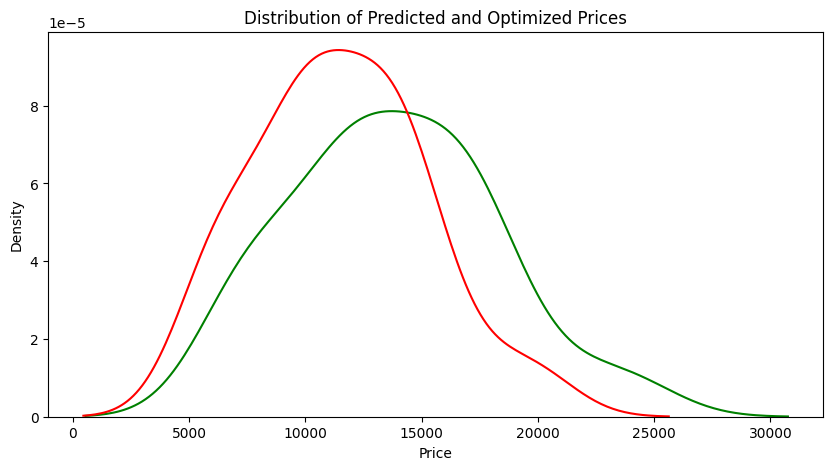

In [30]:
from matplotlib.pyplot import figure

#set size
figure(figsize=(10,5))
       
sns.kdeplot(x=optimized_prices, label='Optimized Prices',color='green')
sns.kdeplot(x=Price_predicted, label='Predicted Prices',color='red')

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Predicted and Optimized Prices')

# 6.  Price Elasticity Demand for Individual - GAM Model
### Brief intro to pyGAM:
GAM stands for Generalized Additive Models that smoothes the semi-parametric models in the form of:

g(E[y|X])=β0+f1(X1)+f2(X2,X3)+…+fM(XN)

Where, X.T = [X_1, X_2, ..., X_N] are the independent variables

y is the dependent variable.

function g() is the link function that relates to the predictor variable. This are the link to the expected value of the predictive variable.

s makes smooth

### 6.1. Data Generation: Adding Data
- Generally when we work on Price Elasticity, basically we generate the price to maximize the Quantity. Our data here, the price is independent variable and Quantity is the dependent variable.



In [31]:
# !pip install pygam

In [32]:
from pygam import s, ExpectileGAM

In [33]:
np.random.seed(0)
n =  100
price = np.sort(np.random.normal(loc = 0, scale = 50, size = n))
quantity = 1000 - 5*price + np.random.normal(loc=0, scale=50, size=n)
quantity = quantity.clip(min = 0)

# Adding Outliers
n_outliers = 10
outlier_prices = np.random.uniform(5, 50, n_outliers)
outlier_quantity = 1100 +np.random.normal(loc = 0, scale = 50, size =  n_outliers)

price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

# ADD OUTLIERS
n_outliers = 10
outlier_prices = np.random.uniform(51, 100, n_outliers)
outlier_quantity = (900 + np.random.normal(loc = 0, scale = 50, size = n_outliers))

Price = np.concatenate([price, outlier_prices])
Quantity = np.concatenate([quantity, outlier_quantity])


df = pd.DataFrame({
    'Price':price,
    'Quantity':quantity
})


### Filtering the Data we have createdwhere the prices are greater than 5

In [34]:
df = df[df['Price'] >=5]
df.head(5)

,Price,Quantity
50,6.083751,966.169166
51,6.345605,1053.939113
52,6.449146,930.516531
53,7.202179,922.667180
54,7.747371,956.340517


# 6.2. Model Visualization 
- Reshape first

In [35]:
X = df[['Price']]
y = df[['Quantity']]

### Now, we can try different GAMs. In the following code each one of the quantities are an ExpectileGAM.
N.B. Quantile Regression is used basically to generate more Flexibility in data over Linear Regression.
- we shall create 3 different GAMs
- where, 0.5 - is the median for the Quantile Regression.
- 0.975 would be very close to the maximum and
- 0.25 would be the minimum

In [36]:
# Quantity GAMs
quantities = [0.025, 0.5, 0.975]

gam_results = {}
for q in quantities:
    gam = ExpectileGAM(s(0), expectile = q)  # s - is smoothing the X['Price'] data
    gam.fit(X,y)
    gam_results[q] = gam
    
gam_results   

{0.025: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.025, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

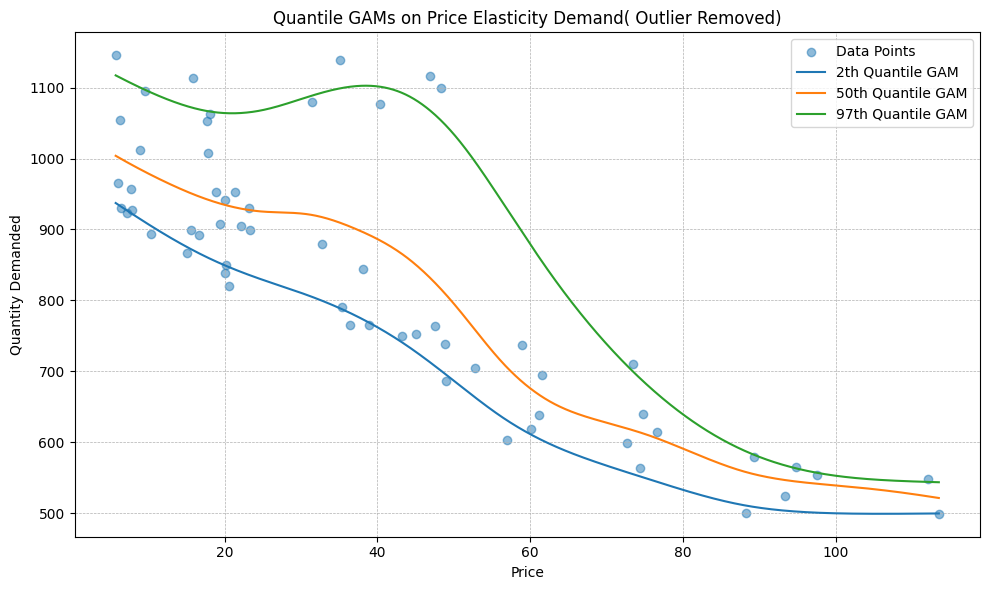

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(df['Price'], df['Quantity'], alpha = 0.5, label = 'Data Points')



xx = np.linspace(df['Price'].min(),df['Price'].max(), 1000).reshape(-1,1)
for q, gam in gam_results.items():
    plt.plot(xx, gam.predict(xx), label = f'{int(q*100)}th Quantile GAM')
    
### Add Title & Label
plt.xlabel('Price')
plt.ylabel('Quantity Demanded')
plt.title('Quantile GAMs on Price Elasticity Demand( Outlier Removed)')
plt.legend()
plt.grid(True, which = 'both', linestyle='--',linewidth =0.5)
plt.tight_layout()
plt.show()

#7. Benefits Of GAMs & Insights
- Quantile GAMs takes into account Changing Variance
- Allows Us to take into account the BEST and the WORST Case Scenarios in Price Optimization Scenarios
- From the Prediction we can see that the 
> The Blue Line - The Quanlile for the Lowest/Minimum of our data
> The Orange Line tracks the median of the data &
> The Green Line for the Maximum 
- We can Track the Upper & the Lower Bounds, because in the Real world scenario the median can devide the data into Best & Worst case scenario so that the Business can guess exact estimation for that. 
